# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import numpy as np

print("keys",train.keys())
print("No of Train Samples",np.shape(X_train) )
print("No of Test Samples", np.shape(X_test))
print(np.shape(y_train))          # Test set Dimensions
print(len(np.unique(y_train)))    # 

keys dict_keys(['coords', 'features', 'labels', 'sizes'])
No of Train Samples (39209, 32, 32, 3)
No of Test Samples (12630, 32, 32, 3)
(39209,)
43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:

# ********************************************************************************
#         SAMPLE TRAINING SET FOR VISUALIZATION
# ********************************************************************************

# Sample 400 images from train dataset for Visualization
# will Sample 400 images across the Training set Partitions
# to get Overview of Training Set Distribution.

rows = 20
columns = 20


def partition_set(image_set, rows=20, columns=20):
    """
        Returns 4 sets with rows*columns randomly sampled from 4 Quantiles
    """
    n_set = len(image_set)
    
    # Parition Indices into 4 Parts
    indx_Q1, indx_Q2, indx_Q3, indx_Q4 = np.array_split(np.array(range(n_set)), 4)
    
    return(
        image_set[[random.sample(list(indx_Q1), rows*columns)]],   # Sample 1st Quantile
        image_set[[random.sample(list(indx_Q2), rows*columns)]],   # Sample 2nd Quantile
        image_set[[random.sample(list(indx_Q3), rows*columns)]],   # Sample 3rd Quantile
        image_set[[random.sample(list(indx_Q4), rows*columns)]],   # Sample 4th Quantile
    )

# Function to Display Images
def show_images(image_set, columns=20):
    
        # Arrange Images in Grid
        image_set = np.concatenate( image_set )  # Concatenate All Images, Default: vertical Axis
        image_set = np.concatenate(
                            np.split(
                                image_set, columns
                            ), 1      # concatenation axis - Horizontal Axis
                        )
        
        # Show Images
        plt.figure(figsize=(10,10))   # Canvas Size
        plt.imshow(image_set)
        plt.show()
        
        
# Sample Training Set

train_Q1, train_Q2, train_Q3, train_Q4 = partition_set(X_train)
 



#   VISUALIZE TRAINING SET

# ====== First 400 Images from Training Set =========
show_images(X_train[:400])

# ===== Random Sample Images From First Quantile =======
show_images(train_Q1)

# ===== Random Sample Images From Second Quantile  ======
show_images(train_Q2)

# ====== Random Sample Images From Third Quantile  =========
show_images(train_Q3)

# ====== Random Sample Images From Fourth Quantile  ========
show_images(train_Q4)



#   TRAIN and  TEST LABEL DISTRIBUTION




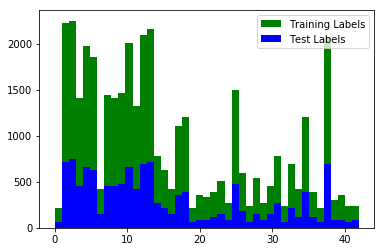

In [6]:
# **********************************************************************
# Plot Train and Test Set  Label  Distribution
# **********************************************************************
plt.hist(y_train,43,color="green",label="Training Labels")
plt.hist(y_test,43,color="blue",label="Test Labels")
plt.legend()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
from sklearn.utils import shuffle
 
X_train, y_train = shuffle(X_train, y_train)
 




# VISUALIZE SHUFFLED TRAINING SET IMAGES



In [9]:
# Sample Training Set

train_Q1, train_Q2, train_Q3, train_Q4 = partition_set(X_train)
 

# ====== First 400 Images from Training Set =========
show_images(X_train[:400])

# ===== Random Sample Images From First Quantile =======
show_images(train_Q1)

# ===== Random Sample Images From Second Quantile  ======
show_images(train_Q2)

# ====== Random Sample Images From Third Quantile  =========
show_images(train_Q3)

# ====== Random Sample Images From Third Quantile  =========
show_images(train_Q4)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  Visualizing samples from different sections of dataset, gives an impression, 
                1. certain category of signs concentrated to some sections.
                2. Results a biased Validation set.
                3. Training might take more iterations to converge.

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [11]:
from sklearn.cross_validation import train_test_split

#  Create Validation Data

print(np.shape(X_train))
print(np.shape(y_train))

X_train , X_valid, y_train, y_valid = train_test_split( X_train, y_train, test_size=0.15, random_state=42)

print(np.shape(X_train))
print(np.shape(y_train))

# Update No.Of Training samples
n_train = np.shape(X_train)[0]


(39209, 32, 32, 3)
(39209,)
(33327, 32, 32, 3)
(33327,)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Plot Train , Validation and Test Set Distribution

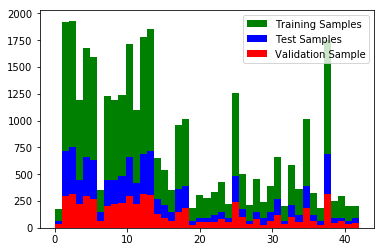

In [12]:

# Plot Train , Validation and Test Set Distribution

plt.hist(y_train,43,color="green",label="Training Samples")
plt.hist(y_test,43,color="blue",label="Test Samples")
plt.hist(y_valid,43,color="red",label="Validation Sample")
plt.legend()

# VISUALIZE  VALIDATION SET

In [13]:
# Sample Training Set

rows = 7
columns = 7

valid_Q1, valid_Q2, valid_Q3, valid_Q4 = partition_set(X_valid,rows,columns)
 

# ====== First 49 Images from Validation Set =========
show_images(X_valid[:49],columns)

# ===== VALIDATION SET : Random Sample Images From First Quantile =======
show_images(valid_Q1, columns)

# ===== VALIDATION SET : Random Sample Images From Second Quantile  ======
show_images(valid_Q2,columns)

# ====== VALIDATION SET : Random Sample Images From Third Quantile  =========
show_images(valid_Q3, columns)

# ====== VALIDATION SET :  Random Sample Images From Third Quantile  =========
show_images(valid_Q4,columns)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
           1. Training Data   : 70% of Whole Data
           2. Validation Data : 10% of Whole Data
           3. Test Data       : 20% of Whole Data

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


# Input

The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.


Architecture

Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to 
do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.


Output

Return the result of the 2nd fully connected layer.



In [15]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    global n_classes
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x18.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 18), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(18))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x18. Output = 14x14x18.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x48.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x48. Output = 5x5x48.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x48. Output = 1200.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1200. Output = 360.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 360), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(360))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    #fc1    = tf.nn.dropout(fc1, 0.8)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 360. Output = 252.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(360, 252), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(252))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    #fc2    = tf.nn.dropout(fc2, 0.8)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 252. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(252, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


# Features and Labels

Train LeNet to classify Traffic Sign data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

You do not need to modify this section.


In [16]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)


# Training Pipeline

Create a training pipeline that uses the model to classify Traffic-Sign data.

You do not need to modify this section.


In [17]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.


# Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.


In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.



In [20]:
EPOCHS = 100
BATCH_SIZE = 64

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.794

EPOCH 2 ...
Validation Accuracy = 0.890

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.921

EPOCH 5 ...
Validation Accuracy = 0.923

EPOCH 6 ...
Validation Accuracy = 0.932

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.945

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.941

EPOCH 12 ...
Validation Accuracy = 0.960

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.973

EPOCH 16 ...
Validation Accuracy = 0.976

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.955

EPOCH 19 ...
Validation Accuracy = 0.978

EPOCH 20 ...
Validation Accuracy = 0.972

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.978

EPOCH 24 ...
Validation Accura

# #   MODEL TESTING

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.928


# METRICS

In [22]:

# ====== Generate Logits for Test Data ======

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    lgts = sess.run(logits, feed_dict={x:X_test})
    

    

# VISUALIZE  SAMPLE IMAGES FOR EACH CLASS


# Sample 4 images from each class for visualization.

for img_class in range(n_classes):
    images_class = X_train[np.equal(y_train,img_class)]                           # Gather images of a Class
    images_class = images_class[np.random.choice(range(len(images_class)), 4)]   # pick 4 random images
    if img_class == 0:
        image_classes = images_class[::]
        continue
    image_classes = np.concatenate((image_classes, images_class))
 
image_classes = np.concatenate((image_classes, images_class))  # Duplicate last Class to make even no of classes
show_images(image_classes,22)   # image, columns



#  CONFUSION MATRIX

In [23]:
import tensorflow as tf

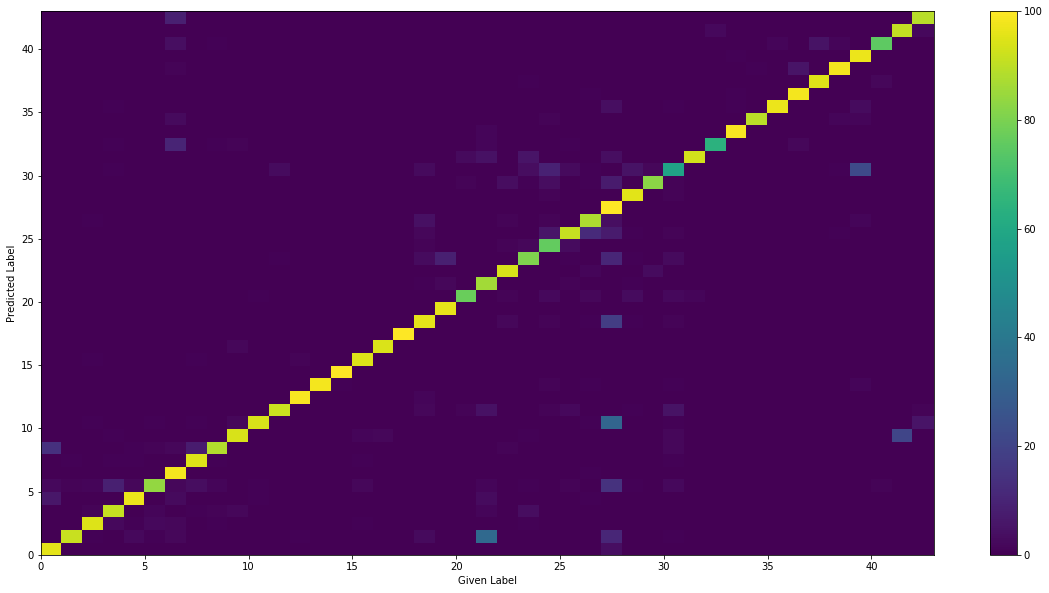

In [24]:
import itertools
np.set_printoptions(threshold=np.inf)


# Calculate Confusion Matrix
cm = np.zeros([n_classes,n_classes])

for i, j in zip( np.argmax(lgts,1), y_test ):
    cm[i][j] += 1
    
# Compute % of miss/correct classification
cm_csum = np.sum(cm,axis=1)
cm_per  = np.divide(cm, cm_csum)*100
 
# Save Confusion matrix
np.savetxt("ConfusionMatrix",cm,delimiter=",")

# Generate Confusion Matrix map

plt.figure(figsize=(20,10))
plt.pcolor(cm_per)
plt.ylabel("Predicted Label")
plt.xlabel("Given Label")
plt.colorbar()


# # A PEEK @  Test Image Vs Classified Class (for missclassified images)



y_pred = np.argmax(lgts,1)

false_pred_test_images = X_test[np.not_equal(y_pred, y_test)]
false_pred_labels = y_pred[np.not_equal(y_pred, y_test)]


sample_fal_pred_test_images = false_pred_test_images[:20]
sample_fal_pred_labels      = false_pred_labels[:20]*4

print("Test-Image","\t","Classified Class")

plt.figure(figsize=(10,30))
plt.imshow( 
            np.concatenate(
                [np.concatenate(sample_fal_pred_test_images),
                np.concatenate(image_classes[sample_fal_pred_labels])],
                axis=1
            )
                
           )



# A PEEK AT MISSCLASSIFIED IMAGES

rows = 5
cols = 15


# Plot Miss Classified Traffic Signs
plt.figure(figsize=(10,10))
plt.imshow(
        np.concatenate(
            np.split(
                np.concatenate(missclassified[:rows*columns]), columns
            ),
            axis=1
        )
    )



# CLASSIFICATION SUMMARY By CLASS


# Plot MissClassified Symbol Histogram

plt.hist(y_train, 43, color="red",label="Training Samples")
plt.hist(y_test, 43, color="green",label="Testing Samples")
plt.hist(y_test[np.not_equal(np.argmax(lgts,1), y_test)] , 43, label="Missclassified test Samples")
plt.legend()


# Plot Correctly Classified Symbol Histogram

plt.hist(y_train, 43, color="red",label="Training Samples")
plt.hist(y_test, 43, color="green",label="Testing Samples")
plt.hist(y_test[np.equal(np.argmax(lgts,1), y_test)] , 43, label="Correctly classified test Samples")
plt.legend()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from PIL import Image
import glob


def PIL2array(img):
    return np.array(img.getdata(),
                    np.uint8).reshape(img.size[1], img.size[0], 3)

web_test = []   # Init Empty Collection

for img_png in glob.glob('data/web/dataset/*.png'): #assuming png
    #print(img_png)
    png=Image.open(img_png)
    png.thumbnail((32,32), Image.ANTIALIAS)  # Resize to 32x32
    
    # Convert to RGB
    png.load()    
    bg = Image.new("RGB", png.size, (255, 255, 255))
    bg.paste(png, mask=png.split()[3]) # 3 is the alpha channel
    #print(np.shape(bg))
    web_test.append(PIL2array(bg))
 
plt.imshow(np.concatenate(web_test))
print(np.shape(web_test))


# Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

lgts_k = tf.nn.top_k(lgts[:6,:], k=5)
with tf.Session() as ses:
    lgts_k5 = ses.run(lgts_k)


# Preview top 5 probabilities

print(np.shape(lgts_k5))
print(lgts_k5)


# Visualize logits as color map

plt.pcolor(lgts[1:20])
plt.colorbar()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# #   MODEL TESTING

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    lgts = sess.run(logits, feed_dict={x:web_test})
    
print(np.argmax(lgts,1))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.